In [1]:
#M Yusril Fauzan Hrp
#1103204015

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = "EconomiesOfScale.csv"
df = pd.read_csv(dataset)
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


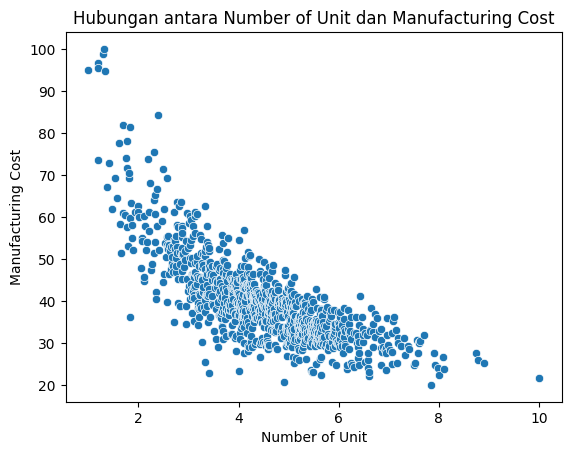

In [6]:
# Membuat scatter plot
sns.scatterplot(data = df, x = "Number of Units", y = "Manufacturing Cost")

# Memberikan judul dan label
plt.title("Hubungan antara Number of Unit dan Manufacturing Cost")
plt.xlabel("Number of Unit")
plt.ylabel("Manufacturing Cost")

# Menampilkan plot
plt.show()

In [7]:
# Kolom label y adalah 'manufacturing cost'
y = df['Manufacturing Cost']

# Kolom fitur x adalah 'number of units'
x = df['Number of Units']

In [8]:
x = np.array(x).reshape(-1, 1) # Mengubah x menjadi matriks 2D dengan satu kolom
y = np.array(y) # Membuat y dari data label (target)

Degree 1: MSE = 47.22
Degree 2: MSE = 37.57
Degree 3: MSE = 35.07
Degree 4: MSE = 34.41
Degree 5: MSE = 34.08
Degree 6: MSE = 33.89
Degree 7: MSE = 33.78
Degree 8: MSE = 33.70
Degree 9: MSE = 33.61
Degree 10: MSE = 33.41
Degree 11: MSE = 33.13
Degree 12: MSE = 33.05


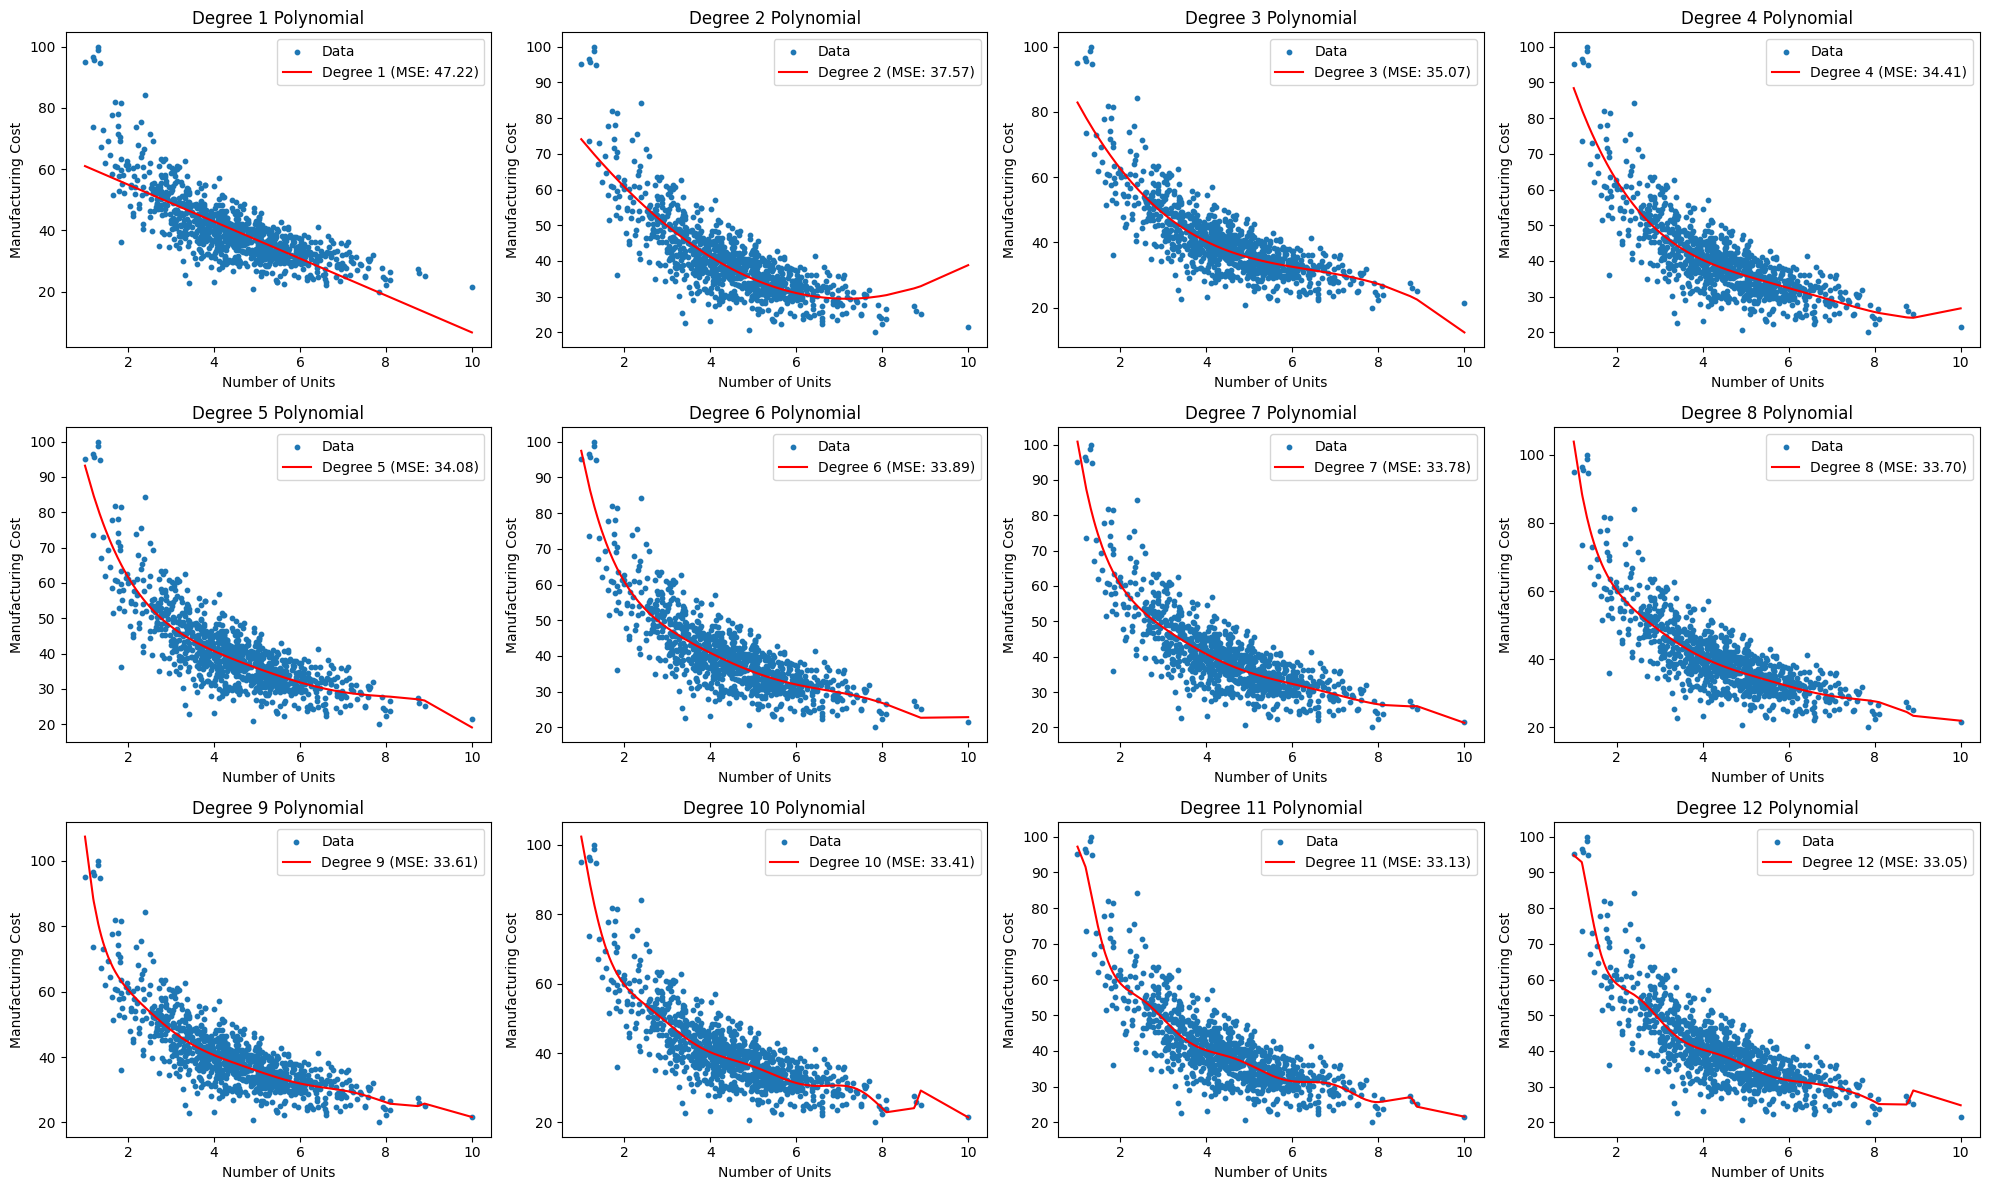

In [9]:
degrees = list(range(1, 13)) # Membuat daftar derajat polinomial yang akan diuji dari 1 hingga 12
mse_values = [] # Membuat list untuk menyimpan nilai MSE
plt.figure(figsize=(20, 12)) # Membuat plot terpisah untuk masing-masing derajat polinomial

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree) # Membuat objek PolynomialFeatures
    x_poly = polynomial_features.fit_transform(x) # Transformasi data menjadi polinomial
    model = LinearRegression() # Membuat model regresi linier dengan data polinomial
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly) # Prediksi dengan model yang telah dibuat
    mse = mean_squared_error(y, y_pred) # Menghitung Mean Squared Error (MSE)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    plt.subplot(3, 4, i + 1)
    plt.scatter(x, y, s=10, label='Data')
    plt.plot(x, y_pred, color='r', label=f'Degree {degree} (MSE: {mse:.2f})')
    plt.title(f'Degree {degree} Polynomial')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()

# Mencetak MSE untuk setiap derajat polinomial
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')

plt.tight_layout()
plt.show()
